## GMG Data Case Study

Objective: The Marketing team wants to learn more about how users interact with food and recipe content. Provide three data backed recommendations and one suggestion on how you might uncover more on this audience, and how to capitalize on the content.

In [1]:
import pandas as pd
import matplotlib
from matplotlib import pyplot as plt
import seaborn as sns
import numpy as np

In [2]:
# Loading Datasets

In [3]:
pageviews = pd.read_csv('~/Documents/GMG_DataCaseStudy/case_study_pageviews.csv')
subscribers = pd.read_csv('~/Documents/GMG_DataCaseStudy/case_study_subscribers.csv')

In [4]:
# Exploratory Data Analysis

In [5]:
# One week worth of pageview activity to food and recipe content
# campaign and page_referrer have the most null values
pageviews.head(3)

,user_id,access_time,page_path,page_title,campaign,page_referrer,article_publication_date,article_format
0,2929017,9/1/20 0:00,/recipes/spicy-coconut-black-bean-soup,Quick and Easy Spicy Coconut Black Bean Soup R...,NaN,https://www.purewow.com/food/black-bean-recipes,1/31/20,Recipe
1,1406718,9/1/20 0:00,/food/best-vanilla-ice-cream,"9 Best Vanilla Ice-Cream Brands, Ranked - PureWow",email,NaN,8/22/20,List
2,1341130,9/1/20 0:00,/food/lucky-charms-marshmallows-only-box,Lucky Charms Just Released Pouches of Marshmal...,NaN,https://www.purewow.com/food/best-vanilla-ice-...,8/26/20,Article


In [6]:
pageviews.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 132662 entries, 0 to 132661
Data columns (total 8 columns):
 #   Column                    Non-Null Count   Dtype 
---  ------                    --------------   ----- 
 0   user_id                   132662 non-null  int64 
 1   access_time               132662 non-null  object
 2   page_path                 132662 non-null  object
 3   page_title                132656 non-null  object
 4   campaign                  80395 non-null   object
 5   page_referrer             62868 non-null   object
 6   article_publication_date  132086 non-null  object
 7   article_format            132086 non-null  object
dtypes: int64(1), object(7)
memory usage: 8.1+ MB


In [7]:
pageviews.describe()

,user_id
count,1.326620e+05
mean,2.473535e+06
std,1.424790e+06
min,4.100000e+01
25%,1.247119e+06
50%,2.332374e+06
75%,3.618669e+06
max,4.940799e+06


In [8]:
# User subscription data
subscribers.head(3)

,user_id,subscription_date,recipe_section_pageviews,food_section_pageviews,fashion_section_pageviews,beauty_section_pageviews,news_section_pageviews
0,896748,2012-09-10 11:15:18.000000,1,0,0,0,0
1,887735,2012-09-07 00:51:12.000000,2,34,0,0,2
2,888222,2012-09-07 07:13:01.000000,1,0,0,0,0


In [9]:
subscribers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38264 entries, 0 to 38263
Data columns (total 7 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   user_id                    38264 non-null  int64 
 1   subscription_date          38264 non-null  object
 2   recipe_section_pageviews   38264 non-null  int64 
 3   food_section_pageviews     38264 non-null  int64 
 4   fashion_section_pageviews  38264 non-null  int64 
 5   beauty_section_pageviews   38264 non-null  int64 
 6   news_section_pageviews     38264 non-null  int64 
dtypes: int64(6), object(1)
memory usage: 2.0+ MB


In [10]:
subscribers.describe()

,user_id,recipe_section_pageviews,food_section_pageviews,fashion_section_pageviews,beauty_section_pageviews,news_section_pageviews
count,3.826400e+04,38264.000000,38264.000000,38264.000000,38264.000000,38264.000000
mean,2.393002e+06,1.504626,1.962367,0.833473,0.248249,2.115958
std,1.398152e+06,3.588135,4.044592,2.059924,1.085827,4.905208
min,4.100000e+01,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.197014e+06,0.000000,1.000000,0.000000,0.000000,0.000000
50%,2.246652e+06,1.000000,1.000000,0.000000,0.000000,0.000000
75%,3.468496e+06,2.000000,2.000000,1.000000,0.000000,2.000000
max,4.940799e+06,327.000000,257.000000,129.000000,60.000000,212.000000


How often are users visiting in one week?

In [11]:
# Use pageviews
# Total for the week, and breakdowns by the day
# Some days have many views at different hours. Let's get a general look at views for a given day, before
# looking at heavier traffic for the day. Note that hours listed in military time.
pageviews2 = pageviews
pageviews2['access_time'] = pageviews2['access_time'].astype(str)
# pageviews2

In [12]:
pageviews2[['access_date','access_time']] = pageviews2['access_time'].str.split(' ',expand=True)
pageviews2.head(2)

,user_id,access_time,page_path,page_title,campaign,page_referrer,article_publication_date,article_format,access_date
0,2929017,0:00,/recipes/spicy-coconut-black-bean-soup,Quick and Easy Spicy Coconut Black Bean Soup R...,NaN,https://www.purewow.com/food/black-bean-recipes,1/31/20,Recipe,9/1/20
1,1406718,0:00,/food/best-vanilla-ice-cream,"9 Best Vanilla Ice-Cream Brands, Ranked - PureWow",email,NaN,8/22/20,List,9/1/20


In [13]:
pageviews2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 132662 entries, 0 to 132661
Data columns (total 9 columns):
 #   Column                    Non-Null Count   Dtype 
---  ------                    --------------   ----- 
 0   user_id                   132662 non-null  int64 
 1   access_time               132662 non-null  object
 2   page_path                 132662 non-null  object
 3   page_title                132656 non-null  object
 4   campaign                  80395 non-null   object
 5   page_referrer             62868 non-null   object
 6   article_publication_date  132086 non-null  object
 7   article_format            132086 non-null  object
 8   access_date               132662 non-null  object
dtypes: int64(1), object(8)
memory usage: 9.1+ MB


In [14]:
pageviews2['access_date'] = pd.to_datetime(pageviews2['access_date']).dt.date
pageviews2.head(2)

,user_id,access_time,page_path,page_title,campaign,page_referrer,article_publication_date,article_format,access_date
0,2929017,0:00,/recipes/spicy-coconut-black-bean-soup,Quick and Easy Spicy Coconut Black Bean Soup R...,NaN,https://www.purewow.com/food/black-bean-recipes,1/31/20,Recipe,2020-09-01
1,1406718,0:00,/food/best-vanilla-ice-cream,"9 Best Vanilla Ice-Cream Brands, Ranked - PureWow",email,NaN,8/22/20,List,2020-09-01


In [15]:
pageviews2 = pageviews2[['user_id', 'access_date', 'access_time', 'page_path', 'page_title', 
                         'campaign', 'page_referrer', 'article_publication_date', 'article_format']]
pageviews2.head(1)

,user_id,access_date,access_time,page_path,page_title,campaign,page_referrer,article_publication_date,article_format
0,2929017,2020-09-01,0:00,/recipes/spicy-coconut-black-bean-soup,Quick and Easy Spicy Coconut Black Bean Soup R...,NaN,https://www.purewow.com/food/black-bean-recipes,1/31/20,Recipe


In [16]:
pageviews2.shape

(132662, 9)

In [17]:
daily_visit = pageviews2.groupby(['access_date'])['user_id'].count().reset_index()
daily_visit

,access_date,user_id
0,2020-09-01,21752
1,2020-09-02,25069
2,2020-09-03,24604
3,2020-09-04,20340
4,2020-09-05,7862
5,2020-09-06,8247
6,2020-09-07,24787
7,2020-09-08,1


In [18]:
# Dropping 9/8/2020 from result set as it skews data. Must have been date of data extraction.

daily_visit = daily_visit.drop(daily_visit.index[7])
daily_visit

,access_date,user_id
0,2020-09-01,21752
1,2020-09-02,25069
2,2020-09-03,24604
3,2020-09-04,20340
4,2020-09-05,7862
5,2020-09-06,8247
6,2020-09-07,24787


In [19]:
dv_mean = daily_visit['user_id'].mean()
dv_mean

18951.571428571428

Text(0.5, 1.0, 'Daily Visits 9/1/20-9/8/20')

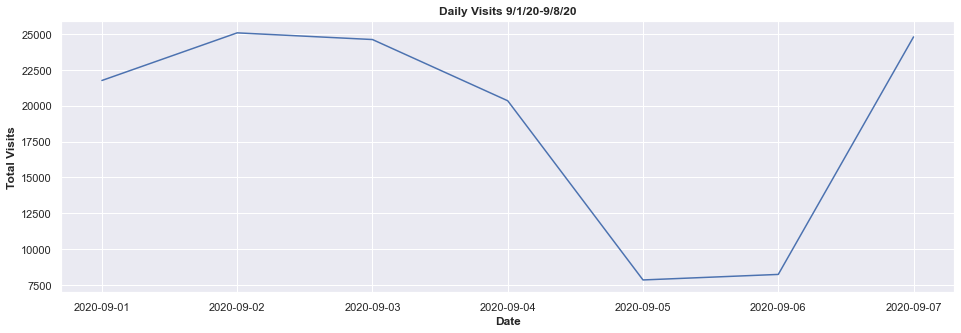

In [20]:
# Line chart reflecting visits throughout the week
sns.set(rc={'figure.figsize': (16,5)})
ax = sns.lineplot(x = 'access_date', y = 'user_id', data = daily_visit)
plt.xlabel('Date', fontweight='bold')
plt.ylabel('Total Visits', fontweight='bold')
plt.title('Daily Visits 9/1/20-9/8/20', fontweight='bold')

Text(0.5, 1.0, 'Daily Visits 9/1/20-9/8/20')

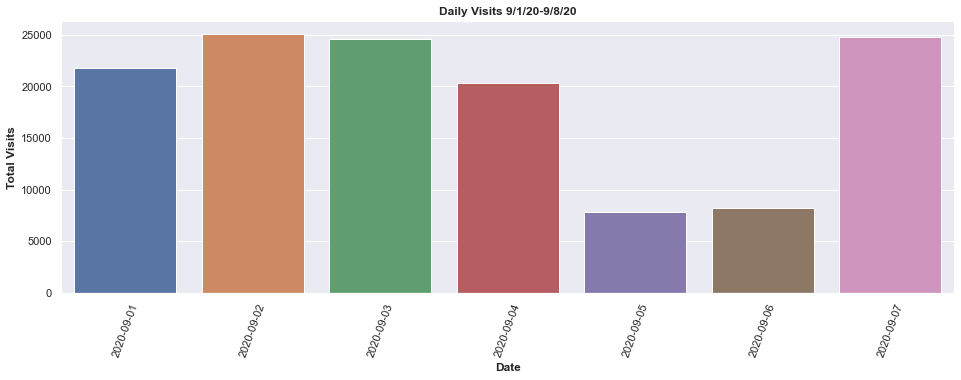

In [21]:
sns.set_style("darkgrid")
sns.set_context("talk")
sns.set(rc={'figure.figsize': (16,5)})

ax = sns.barplot(x = 'access_date', y = 'user_id', data = daily_visit, ci=False)
plt.xticks(rotation=70)
plt.xlabel('Date', fontweight='bold')
plt.ylabel('Total Visits', fontweight='bold')
plt.title('Daily Visits 9/1/20-9/8/20', fontweight='bold')

Text(0.5, 1.0, 'Daily Visits 9/1/20-9/8/20')

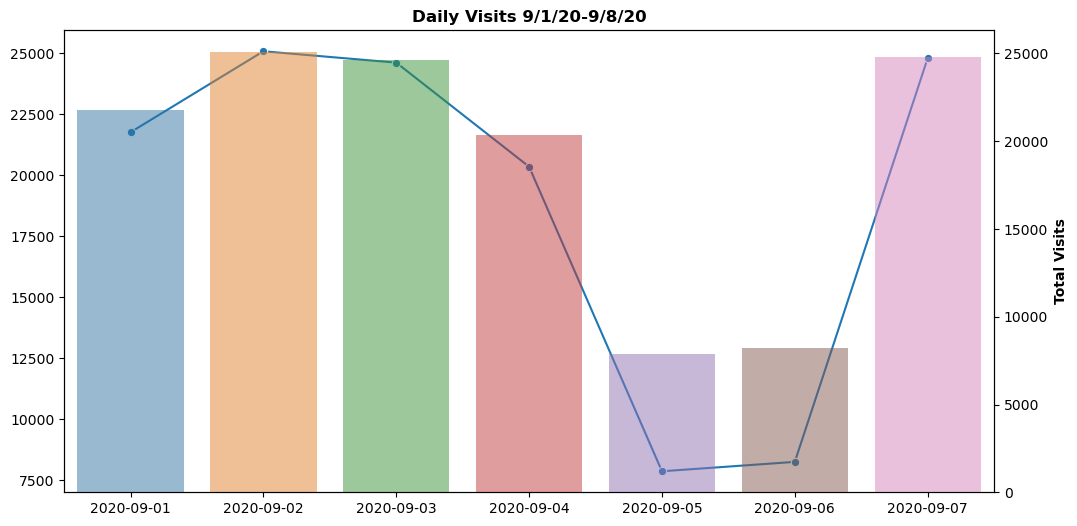

In [22]:
matplotlib.rc_file_defaults()
ax1 = sns.set_style(style=None, rc=None )

fig, ax1 = plt.subplots(figsize=(12,6))

sns.lineplot(data = daily_visit['user_id'], marker='o', sort = False, ax=ax1)
ax2 = ax1.twinx()

sns.barplot(data = daily_visit, x='access_date', y='user_id', alpha=0.5, ax=ax2)
plt.xticks(rotation=70)
plt.xlabel('Date', fontweight='bold')
plt.ylabel('Total Visits', fontweight='bold')
plt.title('Daily Visits 9/1/20-9/8/20', fontweight='bold')

# plt.savefig('GMG_DailyVisits.png')

Users are visiting 132,662 times a week, or 18,952 times a day, excluding the final date (9/1/20) with a single view (as the outlier drastically alters the average). Thursday (9/2), Friday (9/3), and Tuesday (9/7) were the most viewed days of the week, accounting for 74,460 (or 56%) of total views. 

Per our Tableau visualization, the hours of highest traffic during the week lie between noon and 3 PM (common lunch hours), and 4 PM to 6 PM before steadily declining through the evening. Conversely, the lowest amount of traffic on any given day are between the hours of 4 AM and 9 AM. These hours would be the best in which to send out emails. We can definitely work to increase the early morning views, especially for those who browse during their commute. Additionally, it's worth noting that Sunday and Monday receive the least amount of traffic. Generally, weekends adhere less to these trends. People have much more time and options in terms of the media they choose to consume. We can become more relevant here (stay-at-home brunch, lazy sunday recipes, best recipe for starting your week off right, etc.).

# Are people finding our content through other channels?

Apart from PureWow as a page_referrer, there are plenty of views being generated from referrers like Google/Gmail, and Pinterest (seeing as quite a few recipes originated there!). Our email campaign was by far the most successful. It accounts for 79,282, or nearly 60% of traffic for the week.

In [23]:
vs_bycampaign = pageviews2.groupby(['campaign'])['user_id'].count().reset_index()
vs_bycampaign.sort_values('user_id', ascending=False)

# This didn't count the NULLS. Refer to SQL for accurate count.

,campaign,user_id
5,email,79282
9,syndication,485
8,social,407
4,cpc,116
0,10today.ad3li.20200903.421.1,73
7,sms,14
2,10today.ad3li.20200903.smartflab.421.2,7
1,10today.ad3li.20200903.smartflab.421.1,4
3,ASKDRNANDI,3
6,foodandwine,3


39% of all views for the week were generated where no campaign was listed, with the page_referrer primarily being the PureWow site. This could mean that it was "organic" traffic (users landed on the webpage on their own). So, it's good that one of the highest segments of views are devoted readers!

# Which kind of content format is most approachable to our viewers?

As far as food and recipes are concerned, users prefer viewing Recipes and Lists the most, as it's straight to the point in regards to what ingredients are needed, and what they need to do to prepare the meal. Other formats are more involved, requiring more clicks (ie Slideshows), or more active attention (ie Video and Articles).

# Which common themes about the content get the most traction?

The top trending pages all feel new and *relevant*. With Labor Day being 9/7/2020, it's no wonder the highest webpage viewed (by a large margin) was "45 Easy Labor Day Recipes to Celebrate the End of Summer?" We can see that other articles that had traction at this time mentioned Summer (and related foods like Ice Cream), Labor Day, Fall, and September-specific updates (ie What's New at Trader Joe's: September 2020).

There's definitely room to grow when it comes to Social campaigns.

# Conclusions

Recommendations:

The week in data revealed that seasonality and new articles are key to feeling relevant for our users. We saw this impact through the amount of Summer, Fall, and Labor Day content receiving the top spots for viewership. The highest trending content was also published during this year's Summer season. Further, as far as food and recipe content is concerned, Recipe and List formats account for 83% of all views for this week (41.8% and 41.6%, respectively). This means that users want to get right to the point in knowing what they need to prepare and ultimately cook/bake their food. The less attention they have to pay (ie clicking with Slideshows and actively watching Video), the more engaged they will be.

Early morning hours (between 4AM-9AM) aren't the best times to market food and recipe content, but gain much more traction during lunch (noon - 3 PM) and post-work/dinner hours (4PM - 6PM). Sunday and Monday were the lowest points, but could be capitalized on with content like Sunday brunch recipes and simple meal prep recipes for the week.

Email was the most impactful campaign for the week, followed by Organic. Social should be generating more, but it's a positive sign that our efforts via Google/Gmail and Pinterest are working.

Suggestion/Next Steps:

In order to further segment and understand this audience, we should have a lot more demographic information. Age, location, desktop or mobile, session duration, search query, which browser they used to access the site, etc. Each of these can be used to help us better understand user tastes on an individual basis, so we can most effectively market the *right* content to them.

I'd also love to analyze social data generated from Twitter, as Social could potentially make a higher impact on usage and engagement of the product. Natural language processing and sentiment analysis may be long-term goals!